In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')



In [2]:
houses = pd.read_csv('D:\\Data_Science\\train.csv') #----- Read Data
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
print(houses.shape) #---------------- view the metadata
print(houses.describe())
print(houses.info())

(1460, 81)
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min 

In [4]:
print(houses.isnull().sum()) #---- column-wise null count

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [5]:
print(round(100*(houses.isnull().sum()/len(houses.index)),2) )#----------column-wise null percentages

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
                 ...  
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
FireplaceQu      47.26
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageCars        0.00
GarageArea        0.00
GarageQual 

In [6]:
houses = houses.loc[:, houses.isnull().mean() < .05] #------------ dropping columns having large percentage (greater than 5%) of Null values

In [7]:
print(houses.shape)
houses.loc[:0, houses.isnull().mean() > 0]

(1460, 70)


,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical
0,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr


In [8]:
houses.dropna().shape ## size of dataframe with non null rows

(1412, 70)

In [9]:
houses.shape  #### size of data frame

(1460, 70)

#### Since Percenatge of rows with missing values is less then 4 % and because we have enough data, we will remove the rows with missing values

In [10]:
houses = houses.dropna()
houses.shape

(1412, 70)

In [11]:
print(houses.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1412 entries, 0 to 1459
Data columns (total 70 columns):
Id               1412 non-null int64
MSSubClass       1412 non-null int64
MSZoning         1412 non-null object
LotArea          1412 non-null int64
Street           1412 non-null object
LotShape         1412 non-null object
LandContour      1412 non-null object
Utilities        1412 non-null object
LotConfig        1412 non-null object
LandSlope        1412 non-null object
Neighborhood     1412 non-null object
Condition1       1412 non-null object
Condition2       1412 non-null object
BldgType         1412 non-null object
HouseStyle       1412 non-null object
OverallQual      1412 non-null int64
OverallCond      1412 non-null int64
YearBuilt        1412 non-null int64
YearRemodAdd     1412 non-null int64
RoofStyle        1412 non-null object
RoofMatl         1412 non-null object
Exterior1st      1412 non-null object
Exterior2nd      1412 non-null object
MasVnrType       1412 non-

In [12]:
# Checking for duplicates
df = houses.iloc[:,1:]
df["is_duplicate"]= df.duplicated()
df = df[df['is_duplicate'] == True]
df

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,is_duplicate


#### No Dulicates

In [13]:
houses.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [14]:
houses.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars',
       'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'Y

### Analysing and Deriving columns

In [15]:
houses.loc[:, ['YearBuilt','YearRemodAdd','MoSold','YrSold']]

,YearBuilt,YearRemodAdd,MoSold,YrSold
0,2003,2003,2,2008
1,1976,1976,5,2007
2,2001,2002,9,2008
3,1915,1970,2,2006
4,2000,2000,12,2008
5,1993,1995,10,2009
6,2004,2005,8,2007
7,1973,1973,11,2009
8,1931,1950,4,2008
9,1939,1950,1,2008


In [16]:
houses['Remodled'] = houses['YearRemodAdd'] - houses['YearBuilt'] 
houses['Remodled'] = houses['Remodled'].map(lambda x: 0 if x == 0 else 1 )

houses['Remodled'] #---------- 1 if house is remodeled else 0

0       0
1       0
2       1
3       1
4       0
5       1
6       1
7       0
8       1
9       1
10      0
11      1
12      0
13      1
14      0
15      1
16      0
18      0
19      1
20      1
21      1
22      0
23      0
24      1
25      0
26      1
27      1
28      1
29      1
30      1
       ..
1430    0
1431    0
1432    1
1433    0
1434    0
1435    1
1436    0
1437    0
1438    1
1439    0
1440    1
1441    0
1442    0
1443    1
1444    0
1445    0
1446    0
1447    1
1448    1
1449    0
1450    0
1451    1
1452    0
1453    0
1454    1
1455    1
1456    1
1457    1
1458    1
1459    0
Name: Remodled, Length: 1412, dtype: int64

In [17]:
houses['AgeWhnSold'] =round((houses['YrSold'] + (houses['MoSold']/12)) - houses['YearBuilt'], 2)
houses['AgeWhnSold'] #--------------------- Age of the house when sold

0        5.17
1       31.42
2        7.75
3       91.17
4        9.00
5       16.83
6        3.67
7       36.92
8       77.33
9       69.08
10      43.17
11       1.58
12      46.75
13       1.67
14      48.42
15      78.58
16      40.25
18       4.50
19      51.42
20       1.92
21      77.50
22       6.75
23      31.50
24      42.42
25       2.58
26      59.42
27       3.42
28      50.00
29      81.42
30      88.58
        ...  
1430     1.58
1431    33.83
1432    80.67
1433     8.42
1434    29.42
1435    46.58
1436    36.42
1437     0.92
1438    53.33
1439    28.92
1440    86.75
1441     4.42
1442     1.33
1443    93.42
1444     3.92
1445    41.42
1446    48.33
1447    13.00
1448    97.42
1449    36.67
1450    35.75
1451     1.42
1452     1.42
1453     0.58
1454     5.83
1455     8.67
1456    32.17
1457    69.42
1458    60.33
1459    43.50
Name: AgeWhnSold, Length: 1412, dtype: float64

In [18]:
houses['AgeSinRemod'] = round((houses['YrSold'] + (houses['MoSold']/12)) - houses['YearRemodAdd'], 2)
houses['AgeSinRemod'] #-------------------- Age since house is remodeled

0        5.17
1       31.42
2        6.75
3       36.17
4        9.00
5       14.83
6        2.67
7       36.92
8       58.33
9       58.08
10      43.17
11       0.58
12      46.75
13       0.67
14      48.42
15       6.58
16      40.25
18       4.50
19      44.42
20       0.92
21      57.50
22       6.75
23      31.50
24       9.42
25       2.58
26      10.42
27       2.42
28      10.00
29      58.42
30      58.58
        ...  
1430     1.58
1431    33.83
1432     0.67
1433     8.42
1434    29.42
1435     3.58
1436    36.42
1437     0.92
1438    14.33
1439    28.92
1440    14.75
1441     4.42
1442     1.33
1443    59.42
1444     3.92
1445    41.42
1446    48.33
1447    12.00
1448     7.42
1449    36.67
1450    35.75
1451     0.42
1452     1.42
1453     0.58
1454     4.83
1455     7.67
1456    22.17
1457     4.42
1458    14.33
1459    43.50
Name: AgeSinRemod, Length: 1412, dtype: float64

In [19]:
# Removing unwanted columns

houses = houses.drop('YearBuilt',axis = 1)
houses = houses.drop('YearRemodAdd',axis = 1)
houses = houses.drop('MoSold',axis = 1)
houses = houses.drop('YrSold',axis = 1)
print(houses.shape)
houses.columns

(1412, 69)


Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SaleType', 'SaleCondition',
       'SalePrice',

#### Dividing columns into Continuous(Numerical) & Categorical

In [20]:
CV = [ 'MSSubClass','MSZoning','Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle','OverallQual','OverallCond','RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2','Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional','PavedDrive','SaleType','SaleCondition','Remodled']
NV =  list(set(houses.columns) - set(CV))
NV.remove('SalePrice')
NV.remove('Id')
print(CV)
print(len(CV))
print(NV)
print(len(NV))

['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition', 'Remodled']
38
['HalfBath', 'GrLivArea', '2ndFlrSF', 'WoodDeckSF', 'PoolArea', 'OpenPorchSF', 'Fireplaces', 'MasVnrArea', 'TotRmsAbvGrd', 'GarageCars', 'BsmtHalfBath', 'TotalBsmtSF', 'AgeWhnSold', 'AgeSinRemod', 'MiscVal', 'LotArea', 'EnclosedPorch', '1stFlrSF', 'BsmtFinSF1', '3SsnPorch', 'LowQualFinSF', 'BedroomAbvGr', 'BsmtFinSF2', 'BsmtUnfSF', 'KitchenAbvGr', 'GarageArea', 'ScreenPorch', 'FullBath', 'BsmtFullBath']
29


In [21]:
houses.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Remodled,AgeWhnSold,AgeSinRemod
count,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,...,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000
mean,729.773371,56.851983,10536.987252,6.138810,5.595609,105.366856,453.694759,47.792493,581.065156,1082.552408,...,47.247167,22.019122,3.398017,15.572946,2.852691,41.284703,182507.021955,0.479462,36.907854,23.145106
std,422.443710,42.309163,10113.840927,1.357655,1.110511,182.340601,455.373263,163.410333,437.571238,404.766998,...,66.512564,61.192453,29.432240,56.627468,40.851699,494.856654,79270.416057,0.499755,30.417696,20.461146
min,1.000000,20.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,105.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,0.080000,-0.170000
25%,364.750000,20.000000,7572.750000,5.000000,5.000000,0.000000,0.000000,0.000000,247.000000,809.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,131475.000000,0.000000,8.000000,4.670000
50%,727.500000,50.000000,9500.000000,6.000000,5.000000,0.000000,399.000000,0.000000,490.000000,1004.000000,...,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,164600.000000,0.000000,34.580000,14.540000
75%,1098.250000,70.000000,11618.250000,7.000000,6.000000,168.000000,719.250000,0.000000,813.250000,1306.750000,...,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,215000.000000,1.000000,54.500000,40.670000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,...,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000,1.000000,137.000000,60.580000


#### Create dummy variables for Catagorical variables

In [22]:
houses.CentralAir.replace(to_replace=['N', 'Y'], value=[0, 1])

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      0
30      0
       ..
1430    1
1431    1
1432    1
1433    1
1434    1
1435    1
1436    1
1437    1
1438    1
1439    1
1440    1
1441    1
1442    1
1443    0
1444    1
1445    1
1446    1
1447    1
1448    0
1449    1
1450    1
1451    1
1452    1
1453    1
1454    1
1455    1
1456    1
1457    1
1458    1
1459    1
Name: CentralAir, Length: 1412, dtype: int64

In [23]:
for i in CV:
    temp = pd.get_dummies(houses[i], drop_first = True)
    temp = temp.add_prefix(' : ')
    temp = temp.add_prefix(i)
    print(temp)
    houses = pd.concat([houses,temp], axis = 1)
    houses.drop([i], axis = 1, inplace = True)
houses.columns

      MSSubClass : 30  MSSubClass : 40  MSSubClass : 45  MSSubClass : 50  \
0                   0                0                0                0   
1                   0                0                0                0   
2                   0                0                0                0   
3                   0                0                0                0   
4                   0                0                0                0   
5                   0                0                0                1   
6                   0                0                0                0   
7                   0                0                0                0   
8                   0                0                0                1   
9                   0                0                0                0   
10                  0                0                0                0   
11                  0                0                0                0   
12          

      BldgType : 2fmCon  BldgType : Duplex  BldgType : Twnhs  \
0                     0                  0                 0   
1                     0                  0                 0   
2                     0                  0                 0   
3                     0                  0                 0   
4                     0                  0                 0   
5                     0                  0                 0   
6                     0                  0                 0   
7                     0                  0                 0   
8                     0                  0                 0   
9                     1                  0                 0   
10                    0                  0                 0   
11                    0                  0                 0   
12                    0                  0                 0   
13                    0                  0                 0   
14                    0                 

      BsmtQual : Fa  BsmtQual : Gd  BsmtQual : TA
0                 0              1              0
1                 0              1              0
2                 0              1              0
3                 0              0              1
4                 0              1              0
5                 0              1              0
6                 0              0              0
7                 0              1              0
8                 0              0              1
9                 0              0              1
10                0              0              1
11                0              0              0
12                0              0              1
13                0              1              0
14                0              0              1
15                0              0              1
16                0              0              1
18                0              0              1
19                0              0              1


      SaleCondition : AdjLand  SaleCondition : Alloca  SaleCondition : Family  \
0                           0                       0                       0   
1                           0                       0                       0   
2                           0                       0                       0   
3                           0                       0                       0   
4                           0                       0                       0   
5                           0                       0                       0   
6                           0                       0                       0   
7                           0                       0                       0   
8                           0                       0                       0   
9                           0                       0                       0   
10                          0                       0                       0   
11                          

Index(['Id', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       ...
       'SaleType : ConLw', 'SaleType : New', 'SaleType : Oth', 'SaleType : WD',
       'SaleCondition : AdjLand', 'SaleCondition : Alloca',
       'SaleCondition : Family', 'SaleCondition : Normal',
       'SaleCondition : Partial', 'Remodled : 1'],
      dtype='object', length=240)

In [24]:
houses.shape

(1412, 240)

In [25]:
print(NV)

['HalfBath', 'GrLivArea', '2ndFlrSF', 'WoodDeckSF', 'PoolArea', 'OpenPorchSF', 'Fireplaces', 'MasVnrArea', 'TotRmsAbvGrd', 'GarageCars', 'BsmtHalfBath', 'TotalBsmtSF', 'AgeWhnSold', 'AgeSinRemod', 'MiscVal', 'LotArea', 'EnclosedPorch', '1stFlrSF', 'BsmtFinSF1', '3SsnPorch', 'LowQualFinSF', 'BedroomAbvGr', 'BsmtFinSF2', 'BsmtUnfSF', 'KitchenAbvGr', 'GarageArea', 'ScreenPorch', 'FullBath', 'BsmtFullBath']


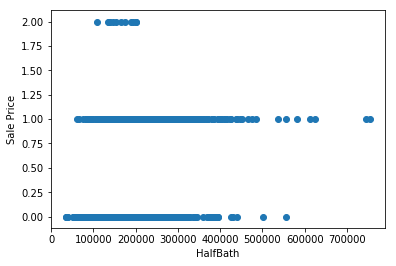

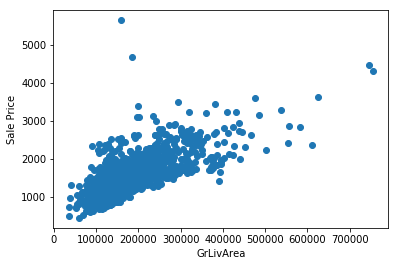

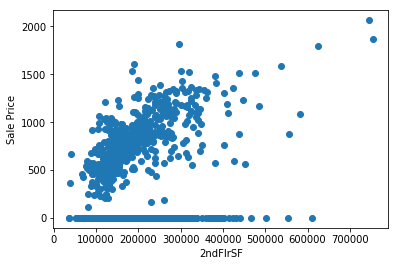

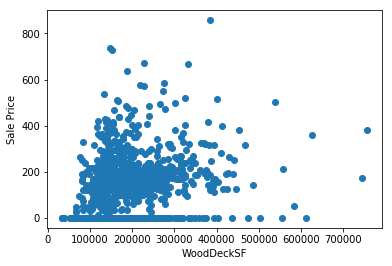

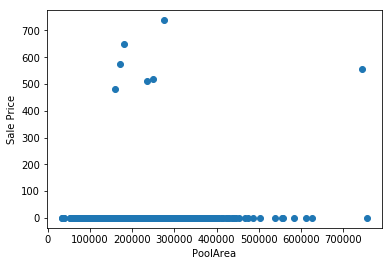

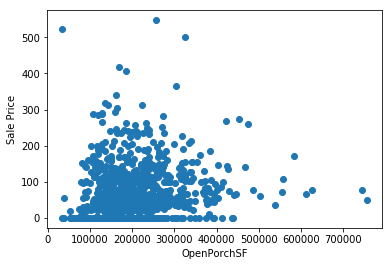

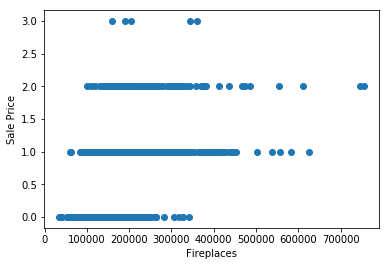

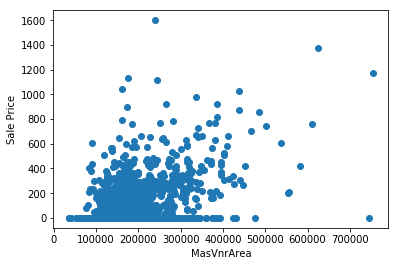

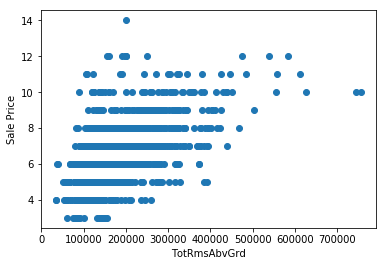

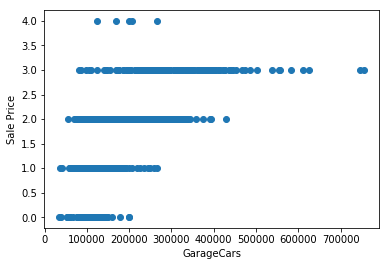

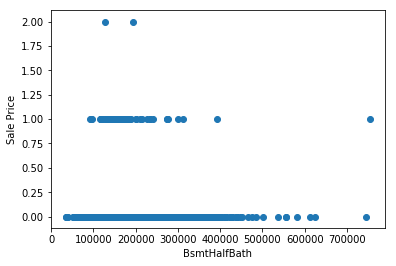

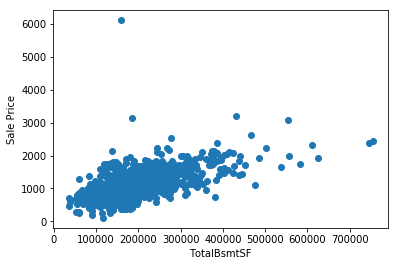

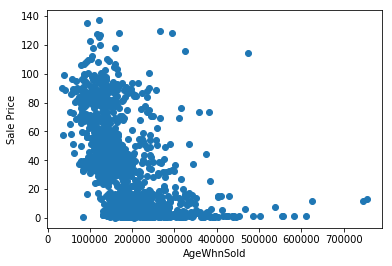

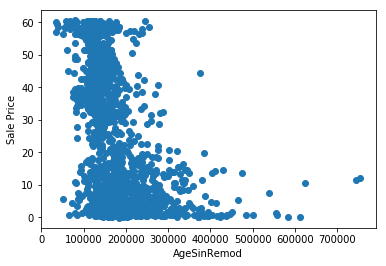

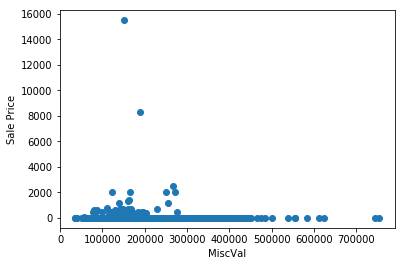

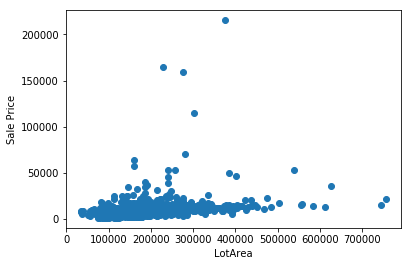

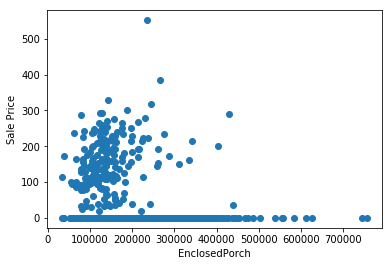

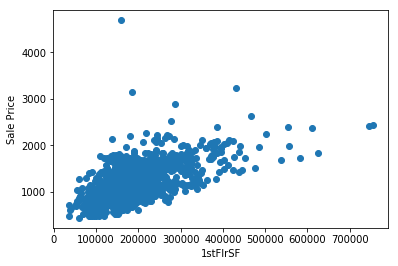

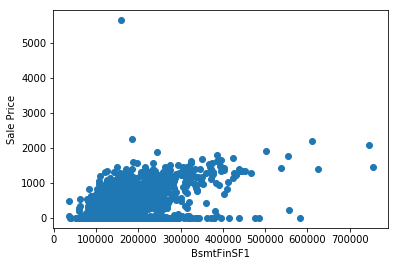

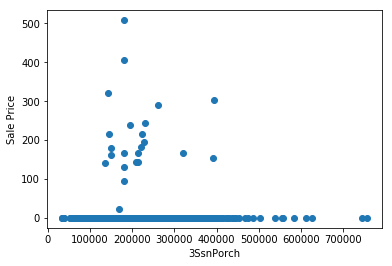

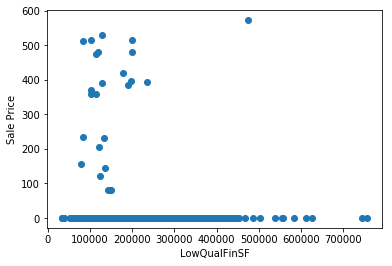

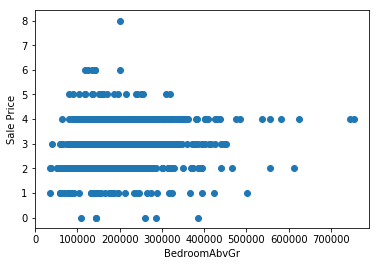

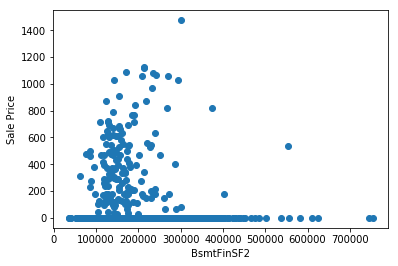

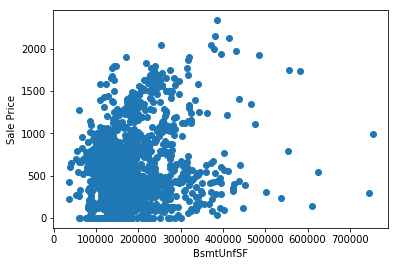

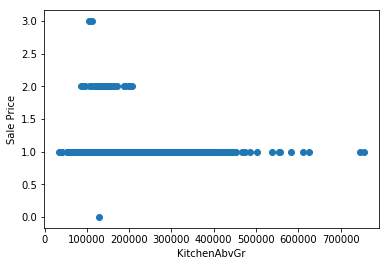

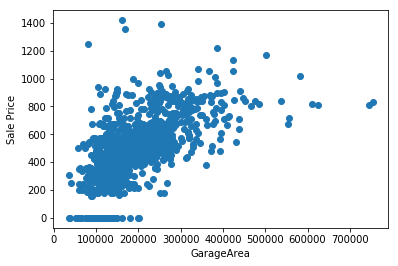

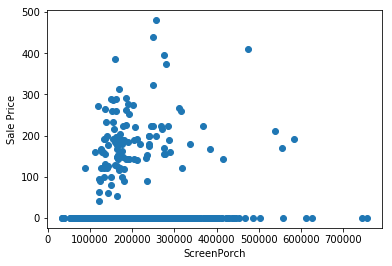

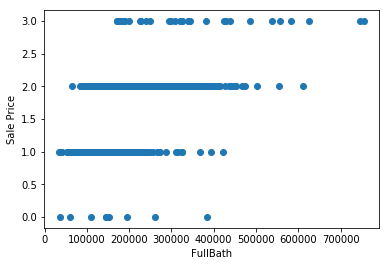

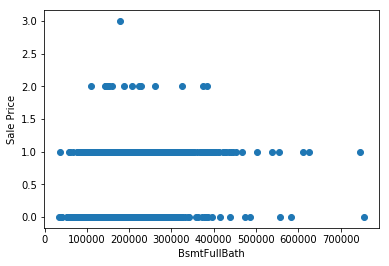

In [26]:
# Visualising numerical variables againest Sale Price 
plt.figure()
for col in NV:
    plt.scatter(houses["SalePrice"], houses[col])
    plt.xlabel(col)
    plt.ylabel("Sale Price")
    plt.show()

#### Clearly, many seems to be related to Sale Price of the house

In [27]:
houses.describe()

,Id,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,SaleType : ConLw,SaleType : New,SaleType : Oth,SaleType : WD,SaleCondition : AdjLand,SaleCondition : Alloca,SaleCondition : Family,SaleCondition : Normal,SaleCondition : Partial,Remodled : 1
count,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,...,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000
mean,729.773371,10536.987252,105.366856,453.694759,47.792493,581.065156,1082.552408,1162.851275,350.942635,6.005666,...,0.003541,0.084278,0.002125,0.866856,0.002125,0.005666,0.014164,0.820822,0.086402,0.479462
std,422.443710,10113.840927,182.340601,455.373263,163.410333,437.571238,404.766998,385.285816,437.740925,49.415492,...,0.059423,0.277902,0.046061,0.339851,0.046061,0.075084,0.118210,0.383638,0.281057,0.499755
min,1.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,105.000000,438.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,364.750000,7572.750000,0.000000,0.000000,0.000000,247.000000,809.500000,882.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,727.500000,9500.000000,0.000000,399.000000,0.000000,490.000000,1004.000000,1086.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1098.250000,11618.250000,168.000000,719.250000,0.000000,813.250000,1306.750000,1392.000000,730.500000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1460.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Feature Selection

#### Since number of features are very high, we are using RFE to bring the number of columns to a small number

In [28]:
#-------- Test-Train Split
from sklearn.model_selection import train_test_split
np.random.seed(0)
houses_train, houses_test = train_test_split(houses, train_size = 0.7, test_size = 0.3, random_state = 100)

In [29]:
#-----------Scaling the numerical variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
houses_train[NV] = scaler.fit_transform(houses_train[NV])

houses_train.head()

,Id,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,SaleType : ConLw,SaleType : New,SaleType : Oth,SaleType : WD,SaleCondition : AdjLand,SaleCondition : Alloca,SaleCondition : Family,SaleCondition : Normal,SaleCondition : Partial,Remodled : 1
53,54,0.228895,0.000000,0.863550,0.0,0.013699,0.561228,0.503226,0.0,0.0,...,0,0,0,1,0,0,0,1,0,1
211,212,0.042628,0.000000,0.017176,0.0,0.503425,0.357674,0.277419,0.0,0.0,...,0,0,0,1,0,0,0,1,0,0
550,551,0.012821,0.000000,0.266698,0.0,0.218322,0.311470,0.226165,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
640,641,0.053177,0.418069,0.581107,0.0,0.128425,0.456543,0.387097,0.0,0.0,...,0,0,0,1,0,0,0,1,0,1
1113,1114,0.035631,0.000000,0.306775,0.0,0.156250,0.291761,0.204301,0.0,0.0,...,0,0,0,1,0,0,0,1,0,1


In [30]:
#-------Diving Data into x(predictors) and y (target variable)

y_train = houses_train.pop('SalePrice')
X_train = houses_train.loc[:,houses_train.columns != 'Id']

In [31]:
print(X_train.head())
print(X_train.shape)
print(X_train.columns)

       LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
53    0.228895    0.000000    0.863550         0.0   0.013699     0.561228   
211   0.042628    0.000000    0.017176         0.0   0.503425     0.357674   
550   0.012821    0.000000    0.266698         0.0   0.218322     0.311470   
640   0.053177    0.418069    0.581107         0.0   0.128425     0.456543   
1113  0.035631    0.000000    0.306775         0.0   0.156250     0.291761   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea      ...       \
53    0.503226       0.0           0.0   0.347697      ...        
211   0.277419       0.0           0.0   0.191679      ...        
550   0.226165       0.0           0.0   0.156265      ...        
640   0.387097       0.0           0.0   0.267459      ...        
1113  0.204301       0.0           0.0   0.141159      ...        

      SaleType : ConLw  SaleType : New  SaleType : Oth  SaleType : WD  \
53                   0               0               0 

In [32]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [33]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [34]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotArea', True, 1),
 ('MasVnrArea', False, 78),
 ('BsmtFinSF1', False, 8),
 ('BsmtFinSF2', False, 11),
 ('BsmtUnfSF', False, 12),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 30),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 57),
 ('BsmtHalfBath', False, 172),
 ('FullBath', False, 76),
 ('HalfBath', False, 210),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 83),
 ('Fireplaces', False, 108),
 ('GarageCars', False, 40),
 ('GarageArea', False, 90),
 ('WoodDeckSF', False, 97),
 ('OpenPorchSF', False, 173),
 ('EnclosedPorch', False, 143),
 ('3SsnPorch', False, 82),
 ('ScreenPorch', False, 58),
 ('PoolArea', True, 1),
 ('MiscVal', False, 200),
 ('AgeWhnSold', True, 1),
 ('AgeSinRemod', False, 101),
 ('MSSubClass : 30', False, 95),
 ('MSSubClass : 40', False, 179),
 ('MSSubClass : 45', False, 158),
 ('MSSubClass : 50', False, 180),
 ('MSSubClass : 60', False, 96),
 ('MSSubClass : 70', False, 175)

In [35]:
col = X_train.columns[rfe.support_]
col #-------- columns chosen by RFE

Index(['LotArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BedroomAbvGr', 'KitchenAbvGr', 'PoolArea', 'AgeWhnSold',
       'LandSlope : Sev', 'Condition2 : PosA', 'OverallQual : 9',
       'OverallQual : 10', 'RoofStyle : Shed', 'RoofMatl : Membran',
       'Exterior1st : BrkComm', 'Exterior1st : CemntBd',
       'Exterior2nd : CmentBd', 'Electrical : Mix', 'Functional : Sev'],
      dtype='object')

### Building the Model

In [36]:
y = houses.loc[:,'SalePrice']
X = houses[col] #------------------ x consist of columns that were chosen from rfe

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 1)

In [37]:
# linear regression
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.7793509922810888

In [38]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred) #----------- Accuracy on test

0.7320083749274915

### Ridge Regression

In [39]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 70, 100, 200, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 70, 100, 200, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [40]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.081414,1.583308e-01,0.000400,0.000490,0.0001,{'alpha': 0.0001},-25249.797872,-24662.823885,-23454.814775,-22746.463350,...,-24391.005739,1141.082517,16,-21927.151826,-23244.133463,-23685.033943,-23942.886839,-22908.218509,-23141.484916,703.881436
1,0.002799,7.477171e-04,0.000600,0.000490,0.001,{'alpha': 0.001},-25249.500958,-24662.329577,-23454.800923,-22746.463315,...,-24390.789105,1140.945700,15,-21927.703150,-23244.622004,-23685.352378,-23943.152784,-22908.486846,-23141.863433,703.797415
2,0.002198,4.006628e-04,0.000400,0.000490,0.01,{'alpha': 0.01},-25246.567348,-24657.465951,-23454.669152,-22746.460995,...,-24388.652804,1139.594647,14,-21933.158525,-23249.450855,-23688.503463,-23945.786290,-22911.147226,-23145.609272,702.966528
3,0.002198,4.000673e-04,0.000400,0.000490,0.05,{'alpha': 0.05},-25234.270528,-24637.481889,-23454.223104,-22746.410805,...,-24379.780228,1133.944298,13,-21956.270040,-23269.742658,-23701.939351,-23956.949941,-22922.626505,-23161.505699,699.452869
4,0.002000,1.886974e-06,0.000400,0.000490,0.1,{'alpha': 0.1},-25220.437506,-24615.786215,-23453.949877,-22746.270457,...,-24369.960845,1127.605825,12,-21982.690874,-23292.722923,-23717.386753,-23969.785727,-22936.282891,-23179.773834,695.442218
5,0.002199,3.997568e-04,0.000400,0.000490,0.2,{'alpha': 0.2},-25197.187320,-24581.388892,-23454.163390,-22745.798499,...,-24353.859070,1116.929384,10,-22028.688908,-23332.771976,-23744.334569,-23992.493648,-22961.343876,-23211.926595,688.504162
6,0.002199,3.998042e-04,0.000400,0.000490,0.3,{'alpha': 0.3},-25178.761392,-24556.028170,-23455.143364,-22745.150938,...,-24341.441269,1108.350192,9,-22067.527512,-23370.884594,-23767.152160,-24012.178075,-22984.009694,-23240.350407,682.861818
7,0.002199,4.000666e-04,0.000400,0.000490,0.4,{'alpha': 0.4},-25163.782235,-24536.784567,-23456.676198,-22744.387403,...,-24331.643095,1101.302579,8,-22101.042008,-23404.863492,-23787.457202,-24029.427707,-23004.590644,-23265.476211,678.156789
8,0.002599,8.087379e-04,0.000604,0.000493,0.5,{'alpha': 0.5},-25151.527900,-24522.080212,-23458.611526,-22743.543043,...,-24324.239012,1095.950803,6,-22130.230957,-23434.158263,-23805.649317,-24044.667142,-23023.664712,-23287.674078,674.117198
9,0.002991,8.941972e-04,0.000400,0.000490,0.6,{'alpha': 0.6},-25142.140413,-24510.820584,-23460.840684,-22742.638912,...,-24318.855437,1092.065023,5,-22155.926771,-23459.767681,-23821.817798,-24058.483927,-23041.079207,-23307.415077,670.639398


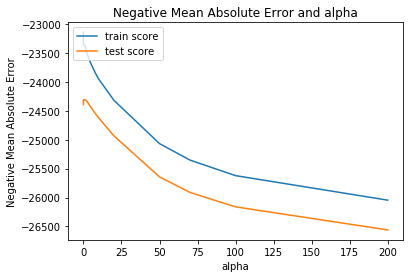

In [41]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### As per graph, and the cv_results,
#### We choose alpha to be 1

In [42]:
alpha = 1
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 7.38602894e-01,  1.14039167e+01,  7.10372487e+01,  5.34233276e+01,
        3.15862875e+01, -9.93495361e+03, -3.76801600e+04, -1.78140217e+02,
       -7.39800592e+02, -2.91702829e+04,  8.74859790e+03,  8.40406693e+04,
        6.84540219e+04,  1.82478555e+03,  3.92956843e+04, -4.61265813e+04,
        2.96383745e+04, -1.87765884e+04, -2.18920725e+04, -6.53076521e+04])

### Lasso Regression

In [43]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 70, 90, 100, 200, 500, 700, 1000 ]}


lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    4.9s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 70, 90, 100, 200, 500, 700, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [44]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.153088,0.258326,0.000600,0.000490,0.0001,{'alpha': 0.0001},-25249.809675,-24662.946939,-23454.812733,-22746.480618,...,-24391.035603,1141.085289,28,-21927.098483,-23244.062235,-23685.002165,-23942.839596,-22908.181801,-23141.436856,703.884531
1,0.026384,0.003820,0.000400,0.000490,0.001,{'alpha': 0.001},-25249.805186,-24662.940720,-23454.812694,-22746.481633,...,-24391.032971,1141.083157,27,-21927.106440,-23244.067260,-23685.006689,-23942.843078,-22908.185802,-23141.441854,703.883159
2,0.034180,0.004531,0.001001,0.000001,0.01,{'alpha': 0.01},-25249.760305,-24662.878532,-23454.812298,-22746.491782,...,-24391.006649,1141.061833,26,-21927.186010,-23244.117507,-23685.051925,-23942.877902,-22908.225811,-23141.491831,703.869434
3,0.030381,0.006148,0.001001,0.000003,0.05,{'alpha': 0.05},-25249.560831,-24662.602144,-23454.810540,-22746.536890,...,-24390.889664,1140.967065,25,-21927.539652,-23244.340826,-23685.252978,-23943.032673,-22908.403630,-23141.713952,703.808437
4,0.036379,0.006339,0.000996,0.000008,0.1,{'alpha': 0.1},-25249.311490,-24662.256657,-23454.808342,-22746.593276,...,-24390.743433,1140.848612,24,-21927.981704,-23244.619974,-23685.504293,-23943.226137,-22908.625904,-23141.991603,703.732192
5,0.035779,0.000748,0.001005,0.000636,0.2,{'alpha': 0.2},-25248.812806,-24661.565685,-23454.803947,-22746.706046,...,-24390.450969,1140.611728,23,-21928.865808,-23245.178272,-23686.006925,-23943.613065,-22909.070452,-23142.546904,703.579710
6,0.029783,0.005737,0.000400,0.000490,0.3,{'alpha': 0.3},-25248.314123,-24660.874713,-23454.799551,-22746.818817,...,-24390.158506,1140.374876,22,-21929.749913,-23245.736569,-23686.509556,-23943.999993,-22909.515000,-23143.102206,703.427238
7,0.024585,0.004755,0.000800,0.000400,0.4,{'alpha': 0.4},-25247.815439,-24660.183741,-23454.795156,-22746.931588,...,-24389.866043,1140.138054,21,-21930.634017,-23246.294867,-23687.012187,-23944.386921,-22909.959548,-23143.657508,703.274776
8,0.024056,0.006730,0.003573,0.006161,0.5,{'alpha': 0.5},-25247.316756,-24659.492769,-23454.790760,-22747.044358,...,-24389.573580,1139.901263,20,-21931.518122,-23246.853164,-23687.514818,-23944.773850,-22910.404096,-23144.212810,703.122324
9,0.024381,0.002327,0.000800,0.000400,0.6,{'alpha': 0.6},-25246.818072,-24658.801796,-23454.786365,-22747.157129,...,-24389.281117,1139.664504,19,-21932.402226,-23247.411462,-23688.017449,-23945.160778,-22910.850056,-23144.768394,702.969788


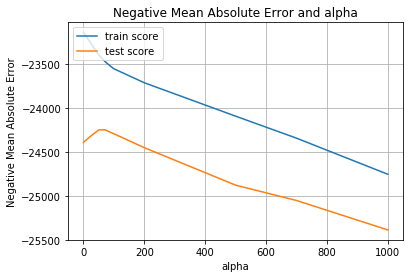

In [45]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.grid(True)
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### We choose alpha, that is the hyperparameter to be 70,
#### as per the figure and the cv_results chart

In [46]:
alpha =70

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.7793509922810888
0.7320083749274915


In [47]:
lasso.coef_

array([ 7.00345973e-01,  1.13786083e+01,  7.09682928e+01,  5.32512219e+01,
        3.17858281e+01, -9.75064302e+03, -3.68650567e+04, -1.77410393e+02,
       -7.42939169e+02, -1.85954634e+04,  0.00000000e+00,  8.37307732e+04,
        6.86142805e+04, -0.00000000e+00,  0.00000000e+00, -1.31200287e+04,
        1.06298629e+04, -0.00000000e+00, -0.00000000e+00, -5.12264379e+04])

In [66]:
Coeff = pd.Series(lasso.coef_)
Feature = pd.Series(col)

In [74]:
df = pd.concat([Feature, Coeff], axis = 1)
df.sort_values(by=[1])

,0,1
19,Functional : Sev,-51226.437927
6,KitchenAbvGr,-36865.056715
9,LandSlope : Sev,-18595.463371
15,Exterior1st : BrkComm,-13120.028742
5,BedroomAbvGr,-9750.643017
8,AgeWhnSold,-742.939169
7,PoolArea,-177.410393
18,Electrical : Mix,-0.000000
10,Condition2 : PosA,0.000000
17,Exterior2nd : CmentBd,-0.000000


#### As you can see, Sale Price of the house is negatively impacted by 'Severely-Damaged rated Home functionality' the most along with
#### if the slope of the property is severe,
#### age of the house is more,
#### and if the external covering of the house is of common bricks.

#### The Price is positvely affected with :
#### If overall quality is 9/10
#### External covering of the house is Cement Board
#### And by area of 1st floor, 2nd floor and Above grade (ground) living area.